# **Ex1 - Unsupervised learning**

## Names and IDs

1.   2.   

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [74]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')

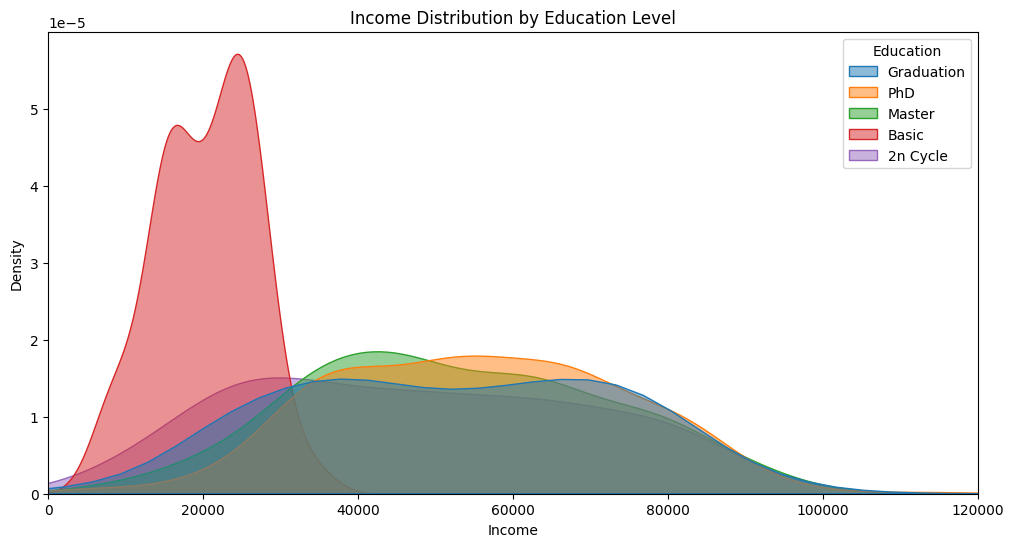

In [75]:
# Density Plot of Income for Different Education Levels
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Income', hue='Education', fill=True, common_norm=False, alpha=0.5)
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Density')
plt.xlim(0, 120000)  # Adjusting x-axis for better visualization, assuming some outliers
plt.show()

**Insight** -

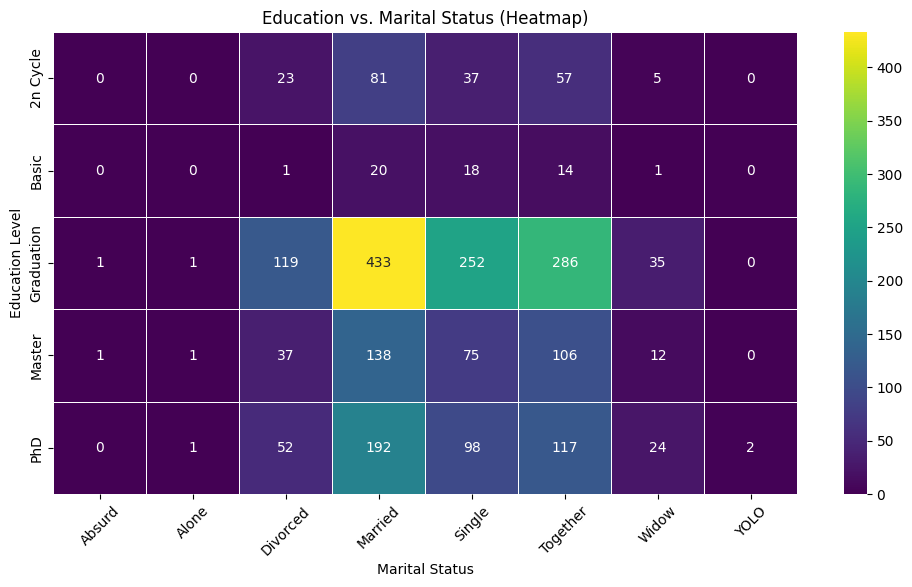

In [76]:
# Heatmap of correlation between education level and marital status
# Create a pivot table to calculate the count of each combination of Education and Marital_Status
pivot_table = df.pivot_table(index='Education', columns='Marital_Status', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.title('Education vs. Marital Status (Heatmap)')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.show()


**Insight** -

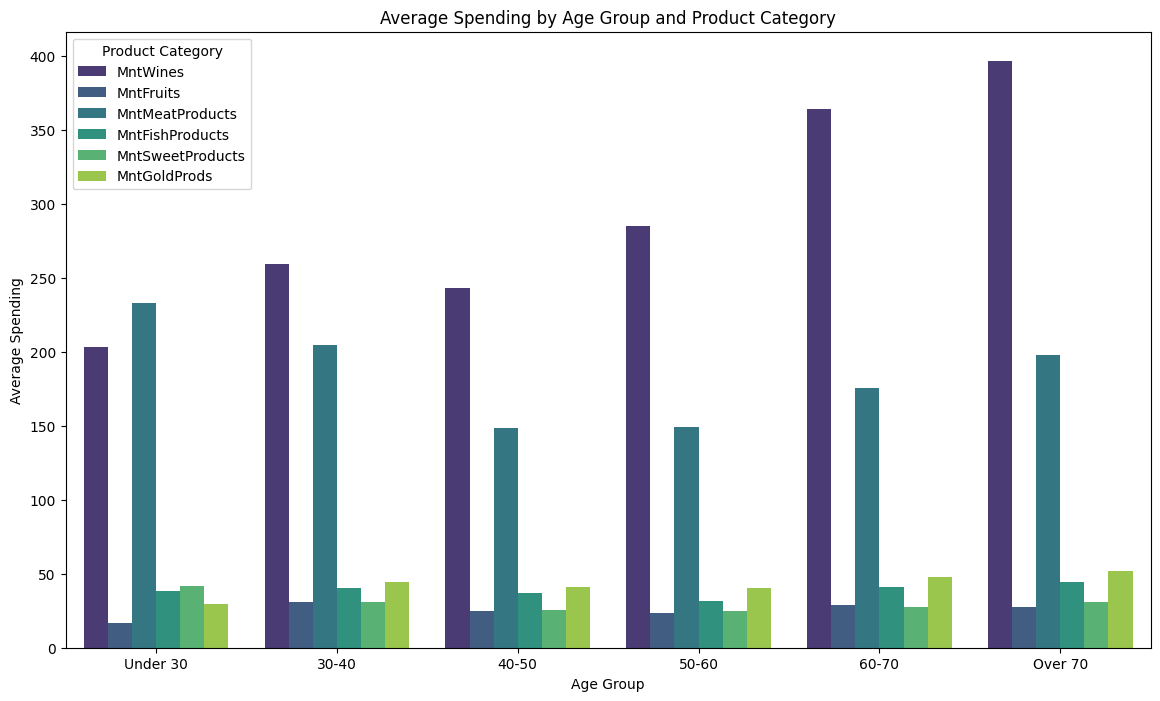

In [77]:
# Correlation between Age, Product category and average spending amount
# Assuming df is your DataFrame after loading the dataset
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['Under 30', '30-40', '40-50', '50-60', '60-70', 'Over 70']

# Create 'Age_Group' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
if 'Age_Group' in df.columns and all(item in df.columns for item in spending_categories):
    # Calculate average spending by age group
    average_spending_by_age_group = df.groupby('Age_Group')[spending_categories].mean()
    # Melt the DataFrame for visualization
    average_spending_melted = average_spending_by_age_group.reset_index().melt(id_vars='Age_Group', var_name='Product_Category', value_name='Average_Spending')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Age_Group', y='Average_Spending', hue='Product_Category', data=average_spending_melted, palette='viridis')
    plt.title('Average Spending by Age Group and Product Category')
    plt.xlabel('Age Group')
    plt.ylabel('Average Spending')
    plt.legend(title='Product Category')
    plt.show()

**Insight** -

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [78]:

# Load your DataFrame from the CSV file
df = pd.read_csv('/content/customer_segmentation.csv')

# drop not informative features
uninformative_columns = ['ID','Z_Revenue','Z_CostContact']
df = df.drop(uninformative_columns, axis=1, errors='ignore')

# Parse the date format into a numeric value which counts the days from the first of 2024 till the each date
date_column = 'Dt_Customer'
date_formats = ['%d/%m/%Y', '%d-%m-%Y']
for date_format in date_formats:
    try:
        df[date_column] = pd.to_datetime(df[date_column], format=date_format)
        break
    except ValueError:
        continue

# Reference date: 1st of January, 2024
reference_date = pd.to_datetime('2024-01-01')
df[date_column] = (reference_date - df[date_column]).dt.days

categorical_cols = ['Marital_Status', 'Education']

# Encoding using label encode
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# calcaulte minmax scaler for numeric features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
combined_data = pd.DataFrame(df)


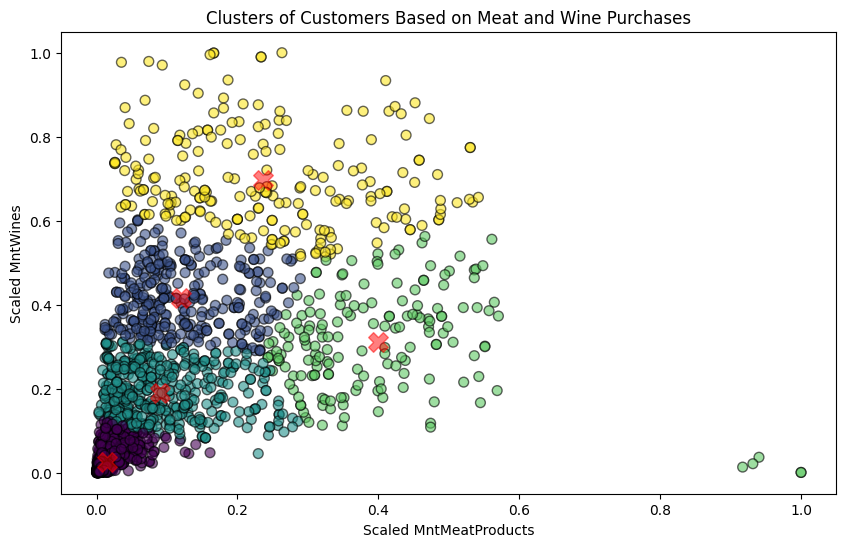

In [79]:
# Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5 (10 points).
features_for_clustering = combined_data.iloc[:, [df.columns.get_loc("MntMeatProducts"), df.columns.get_loc("MntWines")]].values

# Calculting Kmeans with 5 clusters and plot it
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(features_for_clustering)
clusters = kmeans.predict(features_for_clustering)
# plot the clustring graph where y axis is the MntWines values and x axis MntMeatProducts
# resulting points of values clustering in 5 clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_for_clustering[:, 0], features_for_clustering[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters of Customers Based on Meat and Wine Purchases')
plt.xlabel('Scaled MntMeatProducts')
plt.ylabel('Scaled MntWines')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.show()

In [80]:

# Calculate kmeans for different k from 2 to 13 (clusters)
inertia = []
silhouette_scores = []
K_range = range(2, 13)  # Starting from k=1, up to k=10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(combined_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(combined_data, kmeans.labels_))


### Elbow

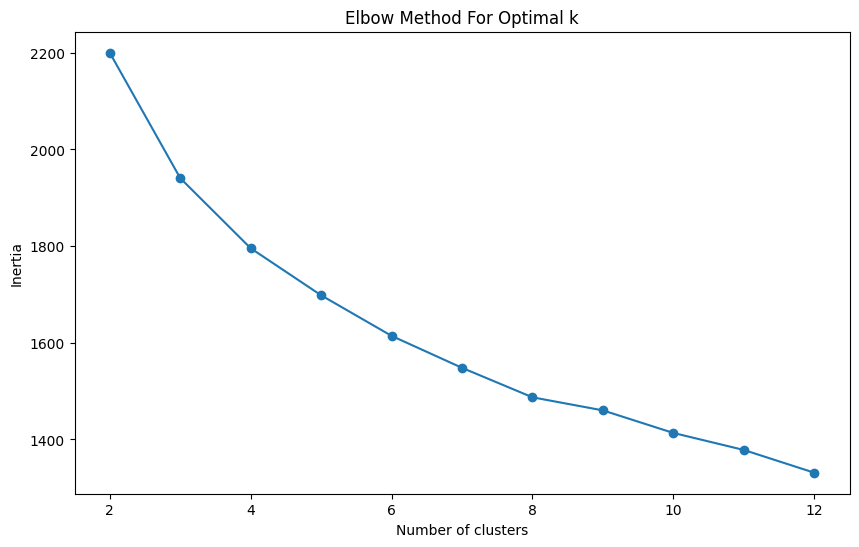

In [81]:
# plot the elbow graph which y axis is the inertia value (sum of distances from centeroid) and the x axis is the amount of clusters (k)
# Visualization for the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score

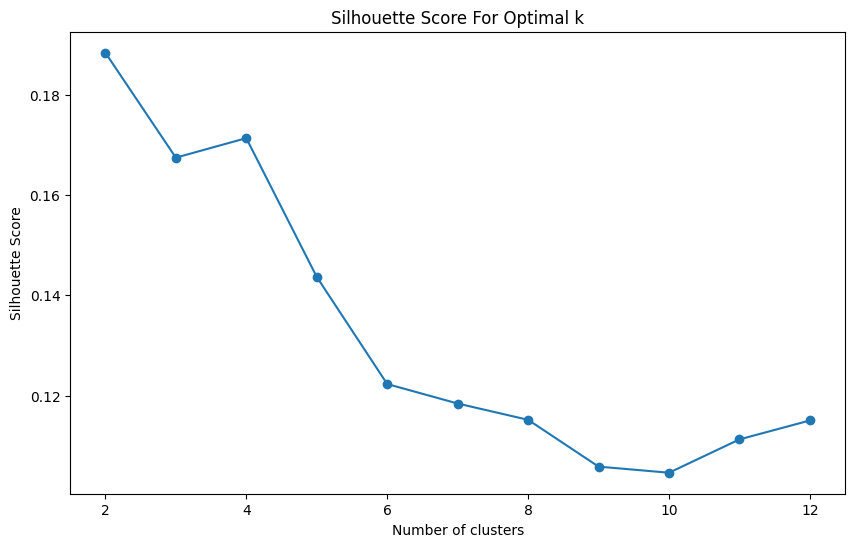

In [82]:
# plot the silhouette scores which y axis is the Silhoutette score value and the x axis is the amount of clusters (k)
# Visualization for the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





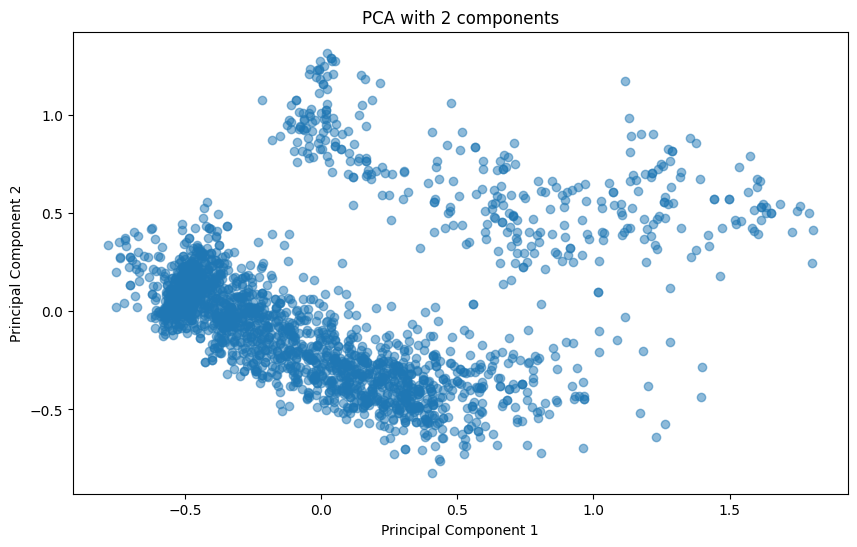

Variance Explained by PCA Component 1: 0.21
Variance Explained by PCA Component 2: 0.12
Total Variance Explained: 0.34


In [83]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Result the 2nd dimention PCA'a graph where y axis is PCA2(less important PCA) and the x axis is PC1(most important PCA)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('PCA with 2 components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# print the variance of each PCA
variance_explained = pca.explained_variance_ratio_
print(f"Variance Explained by PCA Component 1: {variance_explained[0]:.2f}")
print(f"Variance Explained by PCA Component 2: {variance_explained[1]:.2f}")
print(f"Total Variance Explained: {sum(variance_explained):.2f}")

**Q**: What is the variance explained in the 2 component PCA?

**A**: The variance explained which PCA is most describe correctly the data. variance explained by each PCA helps you assess the importance of each component in terms of capturing the data's variability. It allows you to make informed decisions about how many principal components to retain for dimensionality reduction or feature selection while preserving as much information as possible. Our value: 0.34

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





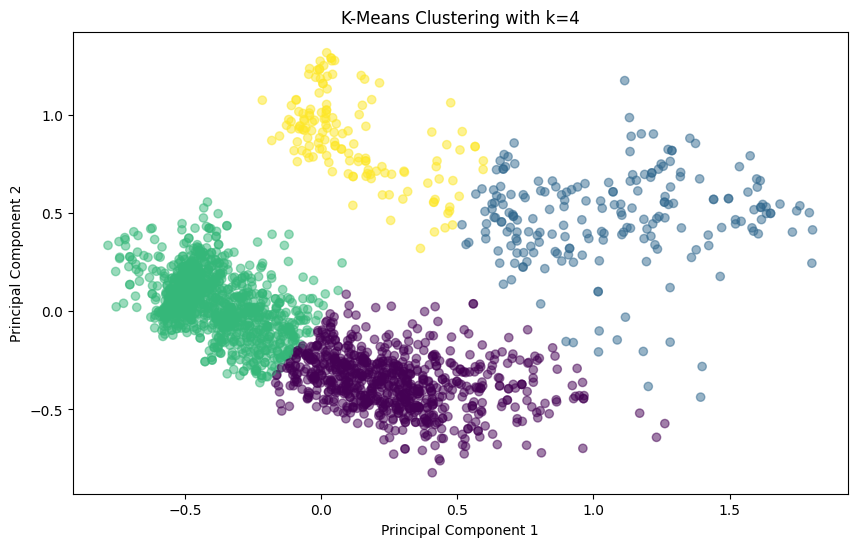

The best number of clusters based on the Silhouette Score is: 4


In [84]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)
inertia = []
silhouette_scores = []
K_range = range(2, 13)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_result, kmeans.labels_))
    best_k = K_range[silhouette_scores.index(max(silhouette_scores))]

# Applying kmeans with the best k
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(pca_result)

# Result the 2nd dimention PCA'a graph where y axis is PCA2(less important PCA) and the x axis is PC1(most important PCA)
# Clustering the values based on the optimal K which is 4 so 4 groups(clusters) are display
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering with k={best_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Answer the question
print(f"The best number of clusters based on the Silhouette Score is: {best_k}")

### Elbow

Text(0, 0.5, 'Inertia')

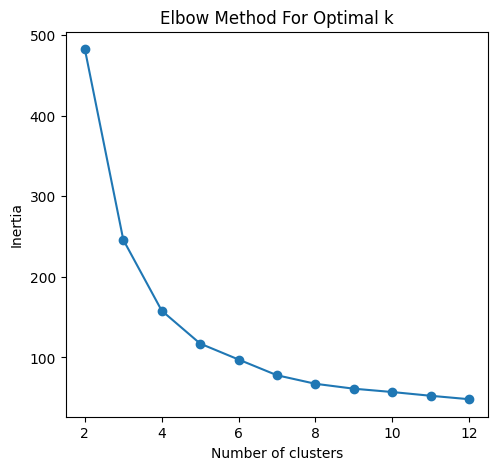

In [85]:
# plot the elbow graph which y axis is the inertia value (sum of distances from centeroid) and the x axis is the amount of clusters (k)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Silhouette

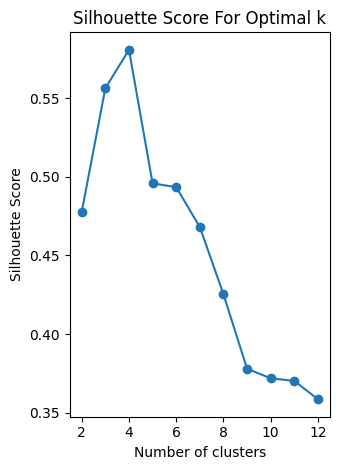

In [86]:
# plot the silhouette scores which y axis is the Silhoutette score value and the x axis is the amount of clusters (k)
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











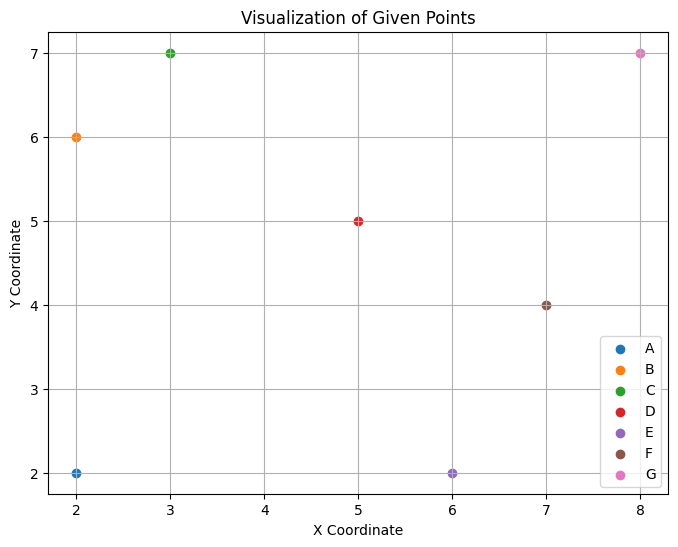

In [87]:
# dict of the sets which are the points we will run kmeans on
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}
plt.figure(figsize=(8, 6))

for point, coord in points.items():
    plt.scatter(*coord, label=point)

# plot the dots value in the x and y axis
plt.title('Visualization of Given Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


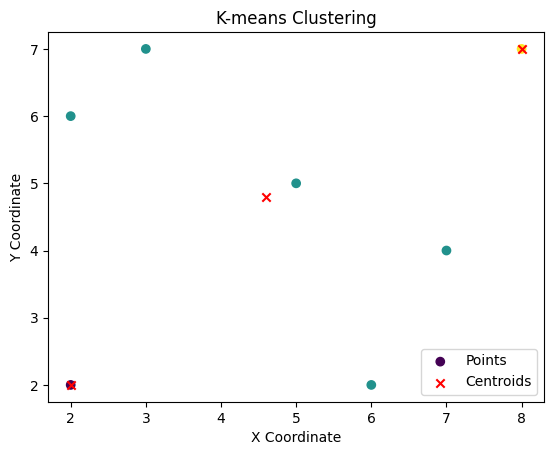

In [88]:
points = np.array([[2, 2], [2, 6], [3, 7], [5, 5], [6, 2], [7, 4], [8, 7]])

# Initial cluster centers (A, D, G)
initial_centers = np.array([[2, 2], [5, 5], [8, 7]])
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=0)
kmeans.fit(points)
labels = kmeans.labels_

# plot the dots value in the x and y axis. also plot the centorids for each cluster marked as X
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', marker='o', label='Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






1. In the final iteration, the points grouped together in a way that minimized the sum of squared distances between each point and its assigned cluster's centroid. The final clusters are determined by the positions of the centroids and the assignment of points to those centroids, based on their proximity.
2. Yes, choosing different initial cluster centers can indeed lead to different final clusters due to the way K-means operates. K-means starts with the initial cluster centers and iteratively assigns points to the nearest cluster and updates the cluster centers based on the mean of the points in each cluster. The algorithm can get stuck in different local optima depending on where it starts.
3. In a supermarket(or any market platform) we want to classify which products are related in order to make sales and group in the same section or shelf related products to increase selling

**Answers**:



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In the following PCA projection matrix we have to egienvectors. In order to convert both 2 dimensions vectors into 1nd vector we shall use the PC1.
PC1 is the vector (1 2) which correspond to the higher eigenvalues of 5.
Therefore the following calculation is:

(1,2)X(1 3)= 1*2 + 2*3= 7 -> 1 dimension value

(1,2)X(3 7)= 1*3 + 2*7= 17 -> 1 dimension value